Run this cell first

In [2]:
import astropy 
from astropy import constants as const
from astropy import units as units

def mass_per_area(density, thickness): 
  return (density * thickness).to(units.g / units.cm**2)

unit_type = astropy.units.quantity.Quantity 

class Electric_battery:
    
    def __init__(self, conversion_type, properties_dict):
        self.conversion_type = conversion_type
        for key in properties_dict.keys():
            setattr(self, key.replace(" ", "_"), properties_dict[key])

    def evaluate(self, isotope_specific_power, isotope_mass_density):
        total_volume = (self.total_thickness * self.area).to(units.cm ** 3)
        isotope_mass_per_area = mass_per_area(isotope_mass_density, 
                                isotope_thickness)
        total_mass_per_area = self.mass_per_area_no_fuel + isotope_mass_per_area
        total_mass_density = (total_mass_per_area * units.cm**2 / 
                                total_volume)
        isotope_power_per_area = (isotope_mass_per_area * 
                                    isotope_specific_power)
        self.specific_power = (self.conversion_efficiency * 
                            isotope_power_per_area / 
                            total_mass_per_area)
        self.power_density = self.specific_power * total_mass_density
        return (self.power_density, self.specific_power)

#Context

The most famous method of converting ionizing radiation into electricity is with radiothermal generators (RTG) which typically have high efficiencies but low power densities due to the mass of the thermal couples. 

Alternatively, there is ongoing research in betavoltaics, the conversion of beta particles into electricity using semiconductors. Although small in mass, they are currently held back energy conversion efficiencies < 10% 

  https://doi.org/10.1016/j.apradiso.2013.07.026 


Recently, there have been theoretical developments in the direct storage of the kinetic energy of beta particles in an electric field, with efficiencies > 20% 

  https://doi.org/10.1016/j.apradiso.2019.03.040

The recent testing of radiolytic conversion assisted by plasmons in thin foils has been tested to have energy efficiencies near 50% 

  https://doi/org/10.1038/srep05249


Promising work also details the use schottky diodes to directly convert beta particles into electricity. 

  https://doi.org/10.1016/j.diamond.2018.03.006



#What is the power density for batteries using each of the above methods? 

##Aqueous plasmon assisted radiolysis 
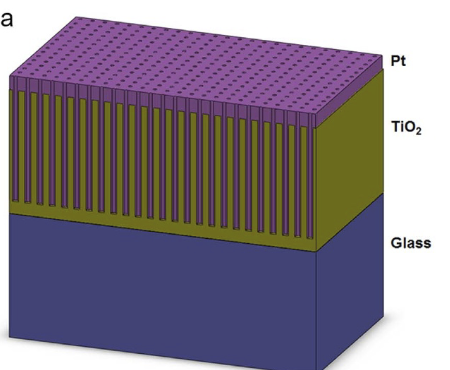

###Setup

In [3]:
power_per_area = 75 * units.microwatt / (units.cm ** 2)
power_per_area

<Quantity 75. uW / cm2>

What is the mass per area of the system? 

"water (1 mm)/Pt (50 nm)/TiO2 (1 mm)/glass (1 mm) structure"

In [5]:
titanium_thickness = 2 * units.micron
platinum_film_thickness = 50 * units.nanometer 
water_thickness = 1 * units.mm
glass_thickness = 1 * units.mm
glass_density = 3 * units.g/(units.cm**3)
titanium_density = 5 * units.g /(units.cm ** 3) 
platinum_density = 20 * units.g / (units.cm ** 3)
water_density = 1 * units.g / (units.cm**3)
mass_per_area_no_fuel = (mass_per_area(platinum_density, platinum_film_thickness)
                    + .5 * mass_per_area(platinum_density, titanium_thickness)
                    + .5 * mass_per_area(titanium_density, titanium_thickness)
+mass_per_area(glass_density, glass_thickness)
+mass_per_area(water_density, water_thickness))
mass_per_area_no_fuel

<Quantity 0.4026 g / cm2>

In [6]:
titanium_thickness + platinum_film_thickness + glass_thickness + water_thickness

<Quantity 2002.05 micron>

https://raw.githubusercontent.com/MarcosP7635/Energy/main/Plots/maximum_power_densities.png?token=GHSAT0AAAAAABU2C3ZHFNZ65NWT3ENBAZGCYX7DANQ 

Even after 10 years, 228Ra would release ~3 W/g

In [6]:
radium_density = 6 * units.g / units.cm**3
radium_thickness = 1 * units.micron #What is the thinnest this could be? 
radium_mass_per_area = mass_per_area(radium_density, radium_thickness) 
total_mass_per_area += radium_mass_per_area
total_mass_per_area

<Quantity 0.1032 g / cm2>

In [7]:
radium_power_density = 5 * units.W / units.g
efficiency = .5 
power_density_aqueous = ((radium_mass_per_area * radium_power_density) / 
                        total_mass_per_area) * efficiency 

In [8]:
total_thickness = (radium_thickness + platinum_film_thickness + 
                   titanium_thickness + water_thickness)
area = 1 * units.cm**2
total_volume = (total_thickness * area).to(units.cm ** 3)
total_mass_density = total_mass_per_area * units.cm**2 / total_volume
total_power_per_volume_aqueous = total_mass_density * power_density_aqueous

###Results

In [9]:
total_power_per_volume_aqueous

<Quantity 0.01495439 W / cm3>

In [10]:
power_density_aqueous

<Quantity 0.01453488 W / g>

##Direct storage with electric field

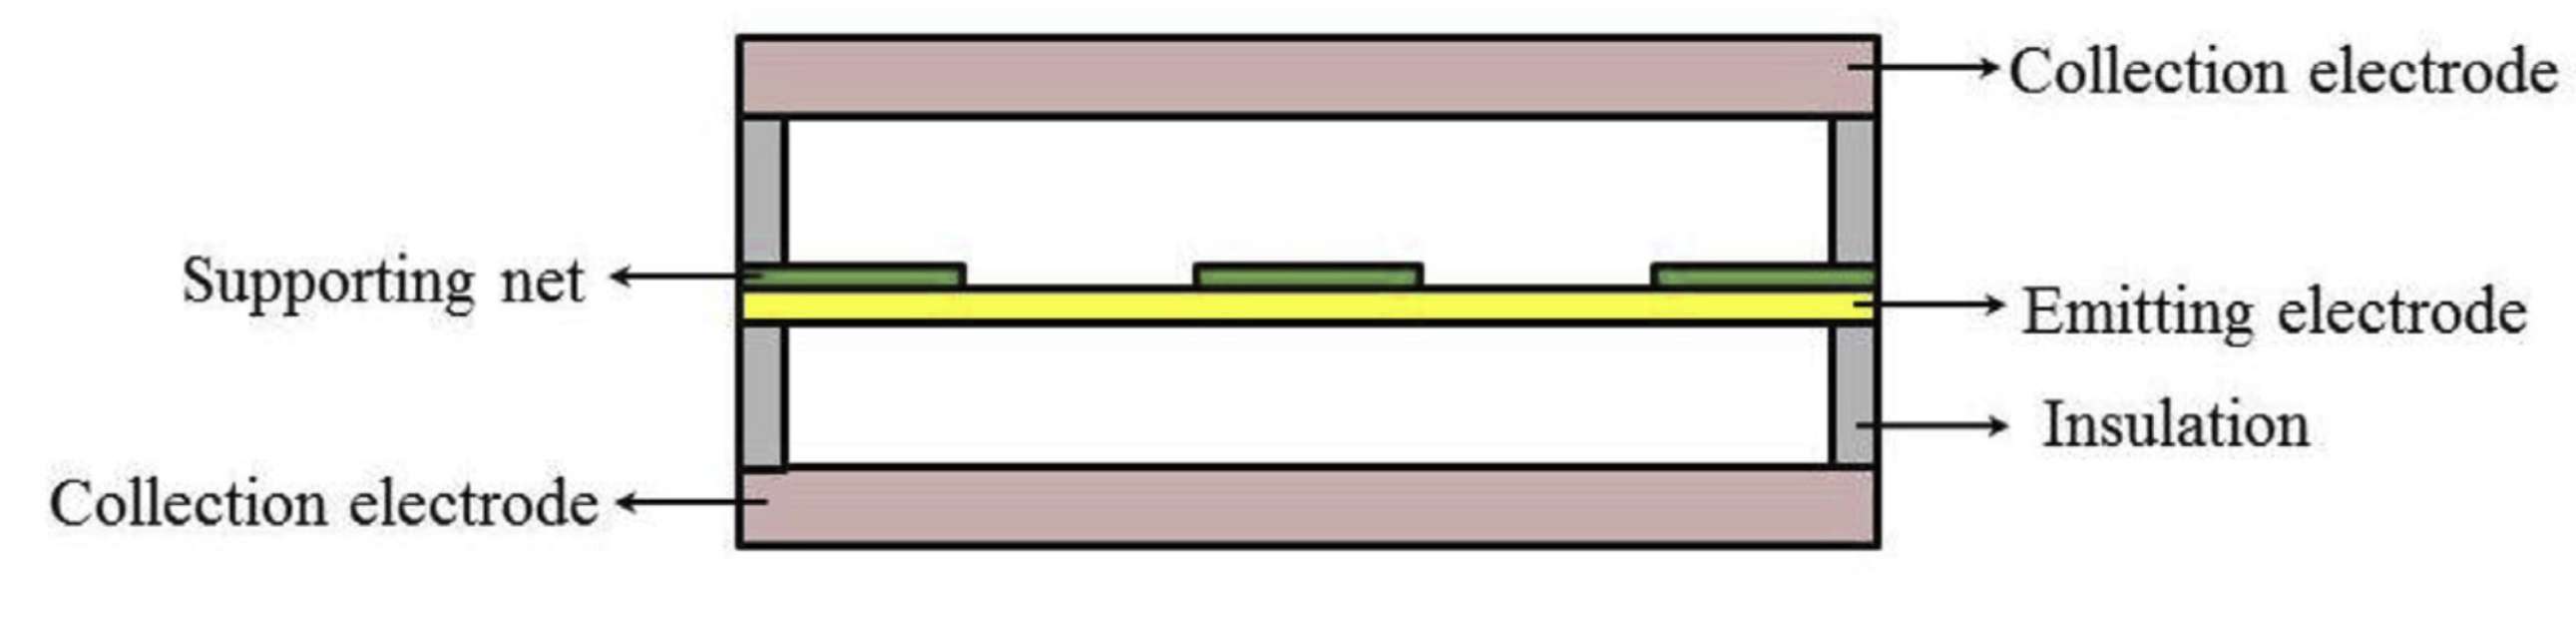

###Setup

In [11]:
isotope_thickness = .2 * units.micron
Be_supporting_net_thickness = 6.3 * units.micron 
Be_supporting_net_space_ratio = .9 
Be_electrode_thicknesss = 160 * units.micron
air_thickness = 2 * units.millimeter
air_pressure = .001 * units.pascal
ptfe_thickness = 2 * units.millimeter # polytetrafluoroethylene insulation
ptfe_density = 2.2 * units.g / units.cm**3
ptfe_area = 10 * units.cm**2
Be_density = 1.85 * units.g / units.cm**3
air_density = ((1.204 * units.kg / units.m**3) *  air_pressure / 
               (101325 * units.pascal)).to(units.g / units.cm**3)

In [12]:
air_mass_per_area = mass_per_area(air_density, air_thickness)
Be_support_net_mass_per_area = mass_per_area(Be_density , 
                                            Be_supporting_net_thickness)
Be_support_net_mass_per_area *= Be_supporting_net_space_ratio
Be_electrode_mass_per_area = mass_per_area(Be_density, Be_electrode_thicknesss)
ptfe_mass_per_area = mass_per_area(ptfe_density, ptfe_thickness)

choosing radium 228 as the isotope to power the battery

In [13]:
isotope_power_density = 5 * units.W / units.g
isotope_power_density *= .2 #energy efficiency of this system
isotope_density = 5.5 * units.g / units.cm**3
isotope_mass_per_area = mass_per_area(isotope_density, isotope_thickness)
isotope_power_per_area = isotope_mass_per_area * isotope_power_density

In [14]:
#ptfe_mass = ptfe_mass_per_area * ptfe_area
total_mass_per_area = (air_mass_per_area + Be_support_net_mass_per_area +
                       Be_electrode_mass_per_area + ptfe_mass_per_area + 
                       isotope_mass_per_area)
direct_conversion_power_density = isotope_power_per_area / total_mass_per_area 

In [15]:
total_mass_per_area - isotope_mass_per_area

<Quantity 0.47064895 g / cm2>

In [16]:
total_thickness = (air_thickness + Be_supporting_net_thickness +
                       Be_electrode_thicknesss + ptfe_thickness + 
                       isotope_thickness)
area = 1 * units.cm**2
total_volume = (total_thickness * area).to(units.cm ** 3)
total_mass_density = total_mass_per_area * units.cm**2 / total_volume
direct_conversion_power_per_volume = (direct_conversion_power_density * 
                                      total_mass_density)

###Results

In [17]:
direct_conversion_power_per_volume

<Quantity 0.00026401 W / cm3>

In [18]:
direct_conversion_power_density

<Quantity 0.00023367 W / g>

##MMRTG 

https://mars.nasa.gov/mars2020/spacecraft/rover/electrical-power/

In [19]:
rtg_specific_power = (110 * units.W / (45 * units.kg)).to(units.W / units.g)
rtg_specific_power

<Quantity 0.00244444 W / g>

##Diamond diodes

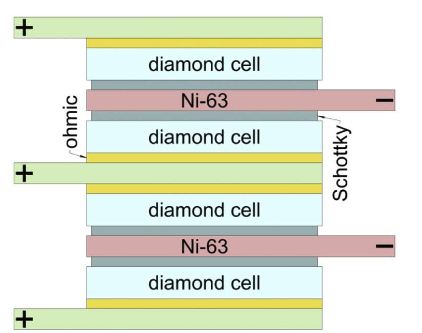


###Setup

In [20]:
diamond_conversion_dict = {"isotope thickness" : 2 * units.micron,
    "mass per area no fuel" : .47064895 * units.g / units.cm**2,
    "total thickness" : 4.1665 * units.millimeter, "area" : 1 * units.cm**2,
    "conversion efficiency" : .2}

def assign_var(name, value):
    globals()[name] = value   

#Applying the above results

Now to write hypothetical battery with specific powers (W/g) and power densities (W/cm$^3$) for any isotope. This function will need to know the power density of an isotope before its radiation is converted into electricity, and the isotope's mass density. 

In [ ]:
def electric_battery(isotope_specific_power, isotope_mass_density,
                     conversion_type):
    if conversion_type == 'direct':
        isotope_thickness = .2 * units.micron
        total_mass_per_area = .47064895 * units.g / units.cm**2
        total_thickness = 4.1665 * units.millimeter
        area = 1 * units.cm**2
        conversion_efficiency = .2
    elif conversion_type == 'aqueous':
        isotope_thickness = 1 * units.micron 
        #What is the thinnest this could be?
        total_mass_per_area = .1026 * units.g / units.cm**2 
        total_thickness = 1003.05 * units.micron
        area = 1 * units.cm**2
        conversion_efficiency = .5
    elif conversion_type == 'thermal':
       #base off of MMRTG. 
       pass
    else:
        return ("No valid conversion type entered. Options are:\n" 
                + "direct, thermal, and aqueous")
    total_volume = (total_thickness * area).to(units.cm ** 3)
    isotope_mass_per_area = mass_per_area(isotope_mass_density, 
                            isotope_thickness)
    total_mass_per_area += isotope_mass_per_area
    total_mass_density = (total_mass_per_area * units.cm**2 / 
                            total_volume)
    isotope_power_per_area = (isotope_mass_per_area * 
                                isotope_specific_power)
    specific_power = (conversion_efficiency * 
                        isotope_power_per_area / 
                        total_mass_per_area)
    power_density = specific_power * total_mass_density
    return (power_density, specific_power)


In [ ]:
electric_battery(5 * units.W / units.g, 5.5 * units.g / units.cm**3, "direct")
#Write a test for this to be the earlier calculated value

(<Quantity 0.00026401 W / cm3>, <Quantity 0.00023367 W / g>)

In [ ]:
electric_battery(5 * units.W / units.g, 5.5 * units.g / units.cm**3, "aqueous")
#Write a test for this to be the earlier calculated value

(<Quantity 0.01370819 W / cm3>, <Quantity 0.0133301 W / g>)

In [ ]:
direct_conversion_dict = {"isotope thickness" : .2 * units.micron,
    "mass per area no fuel" : .47064895 * units.g / units.cm**2,
    "total thickness" : 4.1665 * units.millimeter, "area" : 1 * units.cm**2,
    "conversion efficiency" : .2}   
 
aqueous_conversion_dict = {"isotope thickness" : 1 * units.micron, 
        "mass per area no fuel" : 0.41926667
 * units.g / units.cm**2 ,
        "total thickness" : 2003.05 * units.micron,
        "area" : 1 * units.cm**2,
        "conversion efficiency" : .5}

conversion_properties_dict = {"direct" : direct_conversion_dict,
                     "aqueous" : aqueous_conversion_dict}

def assign_battery_properties(electric_battery):
    properties_dict = conversion_properties_dict[electric_battery.conversion_type]
    for key in properties_dict.keys():
        setattr(electric_battery, "__" + key.replace(" ", "_"), properties_dict[key])
    return electric_battery

In [ ]:
a = Electric_battery("direct", conversion_properties_dict["direct"])
a.evaluate(5 * units.W / units.g, 5.5 * units.g / units.cm**3)

(<Quantity 0.00026401 W / cm3>, <Quantity 0.00023367 W / g>)